### Problem Statement:
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

### Project Objective:

Churn prediction is the process of identifying customers who are likely to stop doing business with a company. This is a critical problem for businesses as it can have a significant impact on revenue and profitability. In recent years, machine learning techniques have been used to predict churn, and TensorFlow is one of the most popular machine learning libraries for this task. In this project, we will discuss how to use TensorFlow for churn prediction.

### Data Description:
Customer churn is a common problem faced by businesses across many industries. In the telecommunications industry, customer churn can have a significant impact on revenue and profitability. Therefore, it is important for telecommunications companies to identify customers who are likely to churn and take steps to retain them. This project will use machine learning techniques to build a predictive model that can accurately identify customers who are likely to churn.

#### Attributes: 
the data set contains 19 independent variables, which can be classified into 3 groups:

##### (1) Demographic Information

gender: Whether the client is a female or a male (Female, Male).

SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).

Partner: Whether the client has a partner or not (Yes, No).

Dependents: Whether the client has dependents or not (Yes, No).

##### (2) Customer Account Information

tenure: Number of months the customer has stayed with the company (Multiple different numeric values).

Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

PaperlessBilling: Whether the client has paperless billing or not (Yes, No).

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).

TotalCharges: The total amount charged to the customer (Multiple different numeric values).

##### (3) Services Information

PhoneService: Whether the client has a phone service or not (Yes, No).

MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).

InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)

OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).

OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).

DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).

TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).

StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

In [167]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [168]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Python and AI intellipat\Projects\PROJECT-8211-CUSTOMER-CHURN-12FEB2023155801\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [169]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

#### Data cleaning and preprocessing:

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

In [170]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [171]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [172]:
#replace 'Yes' and 'No' to '1' and '0'
df['Churn'] = df['Churn'].str.lower().replace({'yes': 1, 'no': 0})

In [174]:
# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can now observe that the column TotalCharges has 11 missing values.

In [175]:
# drop observations with null values
df.dropna(inplace=True)

##### Remove customerID column
The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [176]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

#### Payment method denominations
As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [177]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [178]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [179]:
# unique elements of the PaymentMethod column after the modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

#### Tasks to be done:
#### A) Data Manipulation:
    a. Find the total number of male customers
    b. Find the total number of customers whose Internet Service is ‘DSL’
    c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
    d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500 & store the result in ‘new_customer’

In [180]:
sum(df['gender']=="Male")

3549

In [181]:
sum(df['InternetService']=="DSL")

2416

In [182]:
new_customer=df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]
new_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1
176,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,1
267,Female,1,No,No,19,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,0
451,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,0
470,Female,1,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,0


In [183]:
new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0


#### B) Data Visualization:

    a. Build a pie-chart to show the distribution of customers would be churning out
    b. Build a bar-plot to show the distribution of ‘Internet Service’

In [184]:
names = df["Churn"].value_counts().keys().tolist()
sizes= df["Churn"].value_counts().tolist()

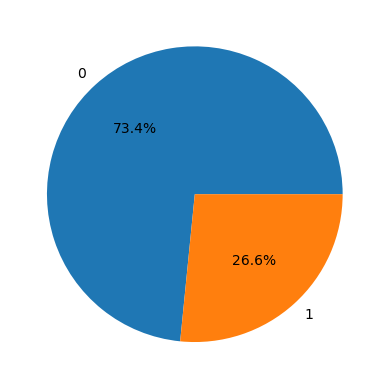

In [185]:
plt.pie(sizes, labels=names, autopct="%0.1f%%")
plt.show()

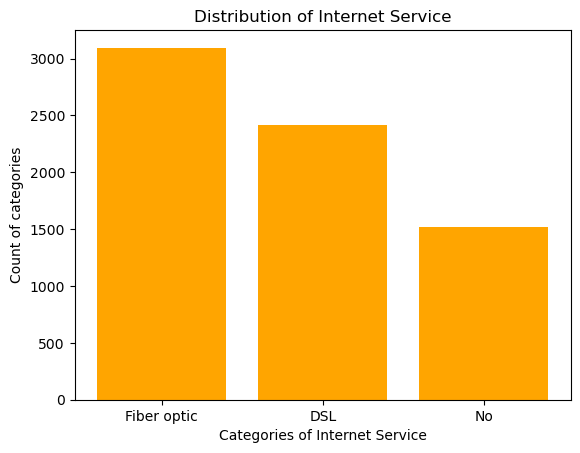

In [186]:
plt.bar(df['InternetService'].value_counts().keys().tolist(), df['InternetService'].value_counts().tolist(), color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

#### C) Model Building:
a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

    i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
    ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
    iii. Use ‘Adam’ as the optimization algorithm
    iv. Fit the model on the train set, with number of epochs to be 150
    v. Predict the values on the test set and build a confusion matrix
    vi. Plot the ‘Accuracy vs Epochs’ graph

In [187]:
#extracting the target and feature columns
x=df[['tenure']]
y=df[['Churn']]

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [189]:
#dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

Going ahead we will add the input layer to our model. This input layer would comprise of 12 nodes and would have ‘relu’ as the activation function. After that we’ll add a hidden layer with 8 nodes and ‘relu’ as activation function. Finally, we’ll add the output layer which would comprise of just one node and ‘sigmoid’ as activation function. We are using ‘sigmoid’ here because this is a binary classification problem and ‘sigmoid’ gives us a probability between 0 & 1.

In [190]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [191]:
#tune the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
#fit the model 
history = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7517 - val_loss: 0.5088 - val_accuracy: 0.7564
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7558 - val_loss: 0.5093 - val_accuracy: 0.7578
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7531 - val_loss: 0.5089 - val_accuracy: 0.7564
Epoch 4/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5045 - accuracy: 0.7554 - val_loss: 0.5088 - val_accuracy: 0.7564
Epoch 5/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5043 - accuracy: 0.7534 - val_loss: 0.5105 - val_accuracy: 0.7517
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7550 - val_loss: 0.5092 - val_accuracy: 0.7564
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7527 - val_loss: 0.5086 - val_accuracy: 0.7564

In [201]:
import numpy as np
np.mean(model.history.history['val_accuracy'])

0.7565371052424112

#### So, the mean accuracy comes out to be 75.65%

In [202]:
#Predicting the values on the test set and build a confusion matrix
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.round())

66/66 [==============================] - 0s 978us/step


array([[1438,  111],
       [ 400,  161]], dtype=int64)

In [203]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


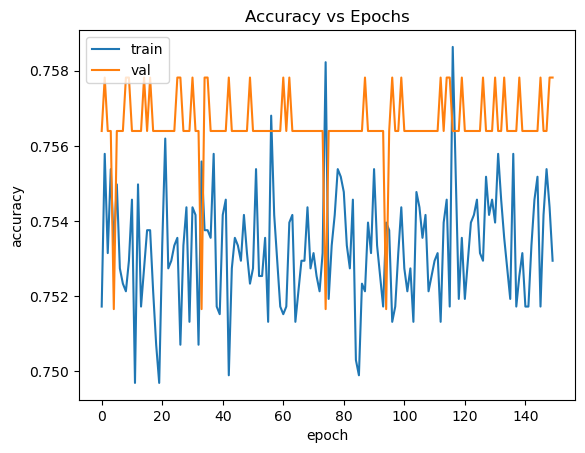

In [205]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

b. Build the 2nd model using same target and feature variables:

    i. Add a drop-out layer after the input layer with drop-out value of 0.3
    ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
    iii. Predict the values on the test set and build a confusion matrix
    iv. Plot the ‘Accuracy vs Epochs’ graph

In [207]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [212]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.7481 - val_loss: 0.5129 - val_accuracy: 0.7341
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7454 - val_loss: 0.5133 - val_accuracy: 0.7341
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7491 - val_loss: 0.5127 - val_accuracy: 0.7341
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7493 - val_loss: 0.5121 - val_accuracy: 0.7341
Epoch 5/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7475 - val_loss: 0.5118 - val_accuracy: 0.7341
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7477 - val_loss: 0.5132 - val_accuracy: 0.7341
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5115 - accuracy: 0.7485 - val_loss: 0.5132 - val_accuracy: 0.7341

In [213]:
import numpy as np
np.mean(model.history.history['val_accuracy'])

0.7341232299804688

#### So, the mean accuracy comes out to be 73.41%

In [214]:
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.round())

66/66 [==============================] - 0s 1ms/step


array([[1549,    0],
       [ 561,    0]], dtype=int64)

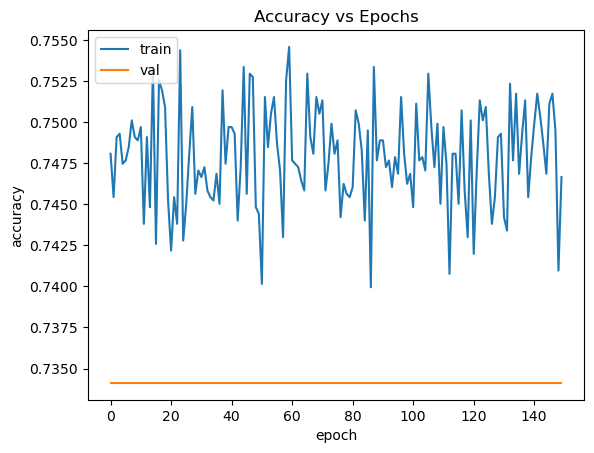

In [215]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

By looking at this graph, we can infer that the validation accuracy is constantly 73.41%. Now, this tells us that something is wrong with our model.

The most probable explanation for this is the drop-out percentage is very high for the input layer and the hidden layer and thus the model which we have built might be underfitting the data.

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

    i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
    ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
    iii. Use ‘Adam’ as the optimization algorithm
    iv. Fit the model on the train set, with number of epochs to be 150
    v. Predict the values on the test set and build a confusion matrix
    vi. Plot the ‘Accuracy vs Epochs’ graph

In [218]:
x=df[['MonthlyCharges','tenure','TotalCharges']]
y=df[['Churn']]

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [220]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [221]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [222]:
history = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 1s 3ms/step - loss: 43.6039 - accuracy: 0.6422 - val_loss: 3.0390 - val_accuracy: 0.5834
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 1.9058 - accuracy: 0.5354 - val_loss: 1.0876 - val_accuracy: 0.5682
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.8469 - accuracy: 0.6168 - val_loss: 1.0384 - val_accuracy: 0.7545
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6806 - accuracy: 0.7296 - val_loss: 0.5032 - val_accuracy: 0.7583
Epoch 5/150
154/154 [==============================] - 1s 5ms/step - loss: 0.7091 - accuracy: 0.7406 - val_loss: 0.9773 - val_accuracy: 0.5057
Epoch 6/150
154/154 [==============================] - 1s 5ms/step - loss: 0.6700 - accuracy: 0.7434 - val_loss: 0.9804 - val_accuracy: 0.5137
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5789 - accuracy: 0.7564 - val_loss: 0.4801 - val_accuracy: 0.767

In [223]:
import numpy as np
np.mean(model.history.history['val_accuracy'])

0.7455734598636627

this gives a mean validation accuracy of 74.55%

In [224]:
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.round())

66/66 [==============================] - 0s 1ms/step


array([[1480,   69],
       [ 408,  153]], dtype=int64)

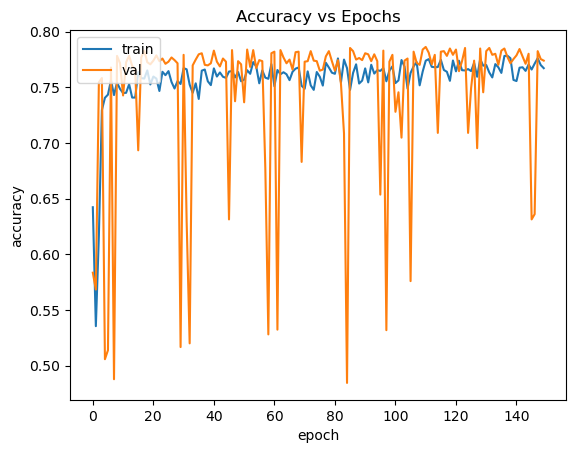

In [225]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Conclusion:

The first model gave us a mean validation accuracy of 75.65%, the second model had accuracy of 73.41 and the third model had a mean validation accuracy of 74.55%. 
The second model gave us the least accuracy because we added two dropout layers with high probabilities of dropout.

Now, there could be many factors why third model’s accuracy was less than that of first model. Most probably one or more of the features used during the model building could be of less significance leading to the reduction in accuracy.

It should also be kept in mind that these accuracy values are very specific to the hyperparameters used during the model building process such as optimizers, activation functions and number of epochs. If we were to tweak these hyperparameters we would get completely different accuracy values for all the three models.